# Patch Analyzer

We will use this to gather all patches info

In [123]:
tools = [
    'Elysium', 
    'sGuard', 
    'sGuardPlus',
    'SmartFix', 
    'SmartShield', 
    "SolGPT" ,
    'TIPS', 
]

In [124]:
#Columns=['Patch','Original','Category','Tool','DIFF','COMP', 'Valid Patches', 'Detected','Fixed', 'Maintained','link']
Columns=['Patch','Original','Category','Tool','DIFF','COMP', 'Detected','Fixed','link']

In [125]:
import os

#collecting contracts name
dataset='smartbugs'
results_path='../results'
contracts_path=os.path.join(results_path,dataset,'contracts.csv')
storage_path=os.path.join(results_path,dataset)

import pandas as pd
contracts_df = pd.read_csv(contracts_path)

import pandas as pd
result_df = pd.DataFrame([], columns=Columns)

In [126]:
result_df

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,link


In [127]:
import re
def get_contract(input_string):
    parts = input_string.split('/')
    return parts[-2]  

def get_category(text):
    match = re.search(r'^([^/]+)', text)
    if match:
        return match.group(1)
    else:
        print('fail on get_category')
        return ''
def get_patch(input_string):
    parts = input_string.split('/')
    return parts[-1]

In [128]:
#test

def test_n_patches(result_df):
    assert len(result_df[result_df['Tool'] == 'Elysium'].values.tolist()) == 126
    assert len(result_df[result_df['Tool'] == 'SmartShield'].values.tolist()) == 134
    assert len(result_df[result_df['Tool'] == 'sGuard'].values.tolist()) == 109
    assert len(result_df[result_df['Tool'] == 'sGuardPlus'].values.tolist()) == 81
    assert len(result_df[result_df['Tool'] == 'SmartFix'].values.tolist()) == 86
    assert len(result_df[result_df['Tool'] == 'TIPS'].values.tolist()) == 242
    assert len(result_df[result_df['Tool'] == 'SolGPT'].values.tolist()) == 552
def test_dataset(result_df):
    assert len(result_df['Original'].unique()) == 141
    assert len(result_df['Category'].unique()) ==10
    assert len(result_df['Tool'].unique()) == 7

def test_diff_patches(result_df):
    assert len(result_df[(result_df['Tool'] == 'Elysium') & (result_df['DIFF'] == True)]) == 101
    assert len(result_df[(result_df['Tool'] == 'SmartShield') & (result_df['DIFF'] == True)]) == 131
    assert len(result_df[(result_df['Tool'] == 'sGuard') & (result_df['DIFF'] == True)]) == 62
    assert len(result_df[(result_df['Tool'] == 'sGuardPlus') & (result_df['DIFF'] == True)]) == 81
    assert len(result_df[(result_df['Tool'] == 'SmartFix') & (result_df['DIFF'] == True)]) == 86
    assert len(result_df[(result_df['Tool'] == 'TIPS') & (result_df['DIFF'] == True)]) == 242
    assert len(result_df[(result_df['Tool'] == 'SolGPT') & (result_df['DIFF'] == True)]) == 552
def test_compilable_patches(result_df):
    assert len(result_df[(result_df['Tool'] == 'Elysium') & (result_df['COMP'] == True)]) == 0  # Elysium does not have compilable data
    assert len(result_df[(result_df['Tool'] == 'SmartShield') & (result_df['COMP'] == True)]) == 0  # Smartshield does not have compilable data
    assert len(result_df[(result_df['Tool'] == 'sGuard') & (result_df['COMP'] == True)]) == 108
    assert len(result_df[(result_df['Tool'] == 'sGuardPlus') & (result_df['COMP'] == True)]) == 81
    assert len(result_df[(result_df['Tool'] == 'SmartFix') & (result_df['COMP'] == True)]) == 86
    assert len(result_df[(result_df['Tool'] == 'TIPS') & (result_df['COMP'] == True)]) == 234
    assert len(result_df[(result_df['Tool'] == 'SolGPT') & (result_df['COMP'] == True)]) == 527

def test_valid_patches(result_df):
    assert len(result_df[(result_df['Tool'] == 'Elysium') & (result_df['Valid Patches'] == True)]) == 101  # Elysium does not have compilable data
    assert len(result_df[(result_df['Tool'] == 'SmartShield') & (result_df['Valid Patches'] == True)]) == 131  # Smartshield does not have compilable data
    assert len(result_df[(result_df['Tool'] == 'sGuard') & (result_df['Valid Patches'] == True)]) == 61
    assert len(result_df[(result_df['Tool'] == 'sGuardPlus') & (result_df['Valid Patches'] == True)]) == 81
    assert len(result_df[(result_df['Tool'] == 'SmartFix') & (result_df['Valid Patches'] == True)]) == 86
    assert len(result_df[(result_df['Tool'] == 'TIPS') & (result_df['Valid Patches'] == True)]) == 234
    assert len(result_df[(result_df['Tool'] == 'SolGPT') & (result_df['Valid Patches'] == True)]) == 527




In [129]:
def read_diff(tools, result_df):
    for tool in tools:
        tool_diff_file='../results/smartbugs/'+tool+'/patches_diff.csv'
        df_diff=pd.read_csv(tool_diff_file, names=['Patch', 'Original','DIFF'], skiprows=1)
        if tool in ['SolGPT', 'Elysium']:
            df_diff=pd.read_csv(tool_diff_file, names=['Patch', 'Original','cleaned','DIFF'], skiprows=1)
        values=df_diff.values.tolist()
        for line in values:
            category= get_category(line[0])
            patch = get_patch(line[0])
            original= get_contract(line[0])+ '.sol'
            diff= line[-1]
            link= 'https://github.com/ASSERT-KTH/RepairComp/blob/main/results/smartbugs/'+tool+'/'+line[0]
            new_row = {'Patch': patch, 'Category': category, 'Original': original, 'Tool':tool, 'DIFF': diff,'link':link}
            result_df = pd.concat([result_df, pd.DataFrame([new_row])], ignore_index=True)
    return result_df
                   


In [130]:
def read_comp(tools,result_df):
    for tool in tools:
        tool_comp_file='../results/smartbugs/'+tool+'/compilation_results_0.4.24.csv'
        df_comp=pd.read_csv(tool_comp_file, names=['Patch', 'COMP'], skiprows=1)
        values=df_comp.values.tolist()
        for line in values:
            category= get_category(line[0])
            patch = get_patch(line[0])
            original= get_contract(line[0])+ '.sol'
            comp= line[-1]
            if comp == 0:
                comp = True
            else :
                comp = False
            mask = (result_df['Patch'] == patch) & (result_df['Category'] == category) & (result_df['Tool'] == tool)
            if mask.any():
                result_df.loc[mask, 'COMP'] = comp
    return result_df
    

In [131]:
def read_d_f_m(tools,result_df):
    for tool in tools:
        tool_dfm_file='../results/smartbugs/'+tool+'/patches_evaluation.csv'
        df_dfm=pd.read_csv(tool_dfm_file, names=['Patch', 'Original','Detected', 'Fixed','Maintained'], skiprows=1)
        values=df_dfm.values.tolist()
        for line in values:
            category= get_category(line[0])
            patch = get_patch(line[0])
            original= get_contract(line[0])+ '.sol'
            D= line[-3]
            F=line[-2]
            #M=line[-1]
            mask = (result_df['Patch'] == patch) & (result_df['Category'] == category) & (result_df['Tool'] == tool)
            result_df.loc[mask, 'Detected'] = D
            result_df.loc[mask, 'Fixed']= F
            #result_df.loc[mask, 'Maintained'] = M
    return result_df

In [143]:
result_df = pd.DataFrame([], columns=Columns)    
result_df=read_diff(tools, result_df)
result_df['Detected'].fillna(False, inplace=True)
result_df['Fixed'].fillna(False, inplace=True)

comp_tools=[
    #'Elysium', 
    'sGuard', 
    'sGuardPlus',
    'SmartFix', 
    #'SmartShield', 
    "SolGPT" ,
    'TIPS', 
]
non_comp_tools=[
    'Elysium', 
    'SmartShield'
]
result_df=read_comp(comp_tools, result_df)

import numpy as np
#cond1 = result_df['Tool'].isin(comp_tools) & (result_df['COMP']==True)& (result_df['DIFF']==True)
#cond2 = result_df['Tool'].isin(non_comp_tools) & (result_df['DIFF'] ==True)
#result_df['Valid Patches'] = np.where(cond1 | cond2, True, False)
result_df=read_d_f_m(tools,result_df)

/tmp/ipykernel_209297/3235050615.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_df['Detected'].fillna(False, inplace=True)
/tmp/ipykernel_209297/3235050615.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df['Detected'].fillna(False, inplace=True)
/tmp/ipykernel_209297/3235050615.py:4: Fut

In [133]:
#result_df[(result_df['Valid Patches']== True) & (result_df['Fixed'].isin( [0,1,2,3,4,5,6]) == False)]

In [144]:
#sanitychecks
test_n_patches(result_df)
test_dataset(result_df)
test_diff_patches(result_df)
test_compilable_patches(result_df)
#test_valid_patches(result_df)

In [145]:
result_df

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,link
0,short_address_example.bin,short_address_example.sol,short_addresses,Elysium,True,NaN,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1,lottopollo.bin,lottopollo.sol,time_manipulation,Elysium,False,NaN,False,False,https://github.com/ASSERT-KTH/RepairComp/blob/...
2,timed_crowdsale.bin,timed_crowdsale.sol,time_manipulation,Elysium,False,NaN,False,False,https://github.com/ASSERT-KTH/RepairComp/blob/...
3,ether_lotto.bin,ether_lotto.sol,time_manipulation,Elysium,True,NaN,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
4,roulette.bin,roulette.sol,time_manipulation,Elysium,True,NaN,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
...,...,...,...,...,...,...,...,...,...
1325,multiowned_vulnerable.sol,multiowned_vulnerable.sol,access_control,TIPS,True,True,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1326,mapping_write.sol,mapping_write.sol,access_control,TIPS,True,True,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1327,wallet_03_wrong_constructor.sol,wallet_03_wrong_constructor.sol,access_control,TIPS,True,True,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1328,mycontract.sol,mycontract.sol,access_control,TIPS,True,True,1,1,https://github.com/ASSERT-KTH/RepairComp/blob/...


In [147]:
#Patch 	Original 	Category 	Tool 	link 	DIFF 	COMP 	Valid Patches 	Fixed 	Maintained 	Undetected
#result_df[result_df['Original']=='0x627fa62ccbb1c1b04ffaecd72a53e37fc0e17839.sol']#duplicate case

In [148]:
def turn_to_per_contract(df,tools,column):
    per_contract=pd.read_csv(contracts_path)
    del per_contract['Occurrences'] 
    del per_contract['Lines'] 
    values=df.values.tolist()
    for tool in tools:
        per_contract[tool]=''
        for line in values:
            line_tool=line[3]
            if line_tool==tool:
                patch=line[0]
                original=line[1]
                category=line[2]
                value=line[list(df.keys()).index(column)]
                find= (per_contract['Name']==original) & (per_contract['Category']==category) 
                if value ==True:
                    per_contract.loc[find, tool] = value
    
    return per_contract
        

In [149]:
def turn_to_per_contract_dfm(df,tools,column):
    per_contract=pd.read_csv(contracts_path)
    del per_contract['Occurrences'] 
    del per_contract['Lines'] 
    values=df.values.tolist()
    for tool in tools:
        per_contract[tool]=''
        for line in values:
            line_tool=line[3]
            if line_tool==tool:
                patch=line[0]
                original=line[1]
                category=line[2]
                value=line[list(df.keys()).index(column)]
                find= (per_contract['Name']==original) & (per_contract['Category']==category) 
                if value>0:
                    bool_value= value>0 #means if fixed,detected, or 
                    per_contract.loc[find, tool] = bool_value
    
    return per_contract

In [150]:
per_c_diff=turn_to_per_contract(result_df,tools,'DIFF')
per_c_diff[per_c_diff==True].count()

Name             0
Category         0
Elysium        101
sGuard          62
sGuardPlus      81
SmartFix        86
SmartShield    131
SolGPT         139
TIPS           140
dtype: int64

In [151]:
per_c_comp=turn_to_per_contract(result_df,tools,'COMP')
per_c_comp[per_c_comp==True].count()

Name             0
Category         0
Elysium          0
sGuard         108
sGuardPlus      81
SmartFix        86
SmartShield      0
SolGPT         138
TIPS           138
dtype: int64

In [152]:
#add a column that counts the amout of tools with True value
per_c_comp['count']=per_c_comp[tools].apply(lambda x: x[x==True].count(), axis=1)
per_c_comp[per_c_comp['count']>2].count()

Name           127
Category       127
Elysium        127
sGuard         127
sGuardPlus     127
SmartFix       127
SmartShield    127
SolGPT         127
TIPS           127
count          127
dtype: int64

In [153]:
#per_c_valid=turn_to_per_contract(result_df,tools,'Valid Patches')
#per_c_valid[per_c_valid==True].count()

In [154]:
per_c_d=turn_to_per_contract_dfm(result_df,tools,'Detected')
per_c_d[per_c_d==True].count()

Name            0
Category        0
Elysium        53
sGuard         35
sGuardPlus     70
SmartFix       51
SmartShield    60
SolGPT         97
TIPS           82
dtype: int64

In [155]:
per_c_f=turn_to_per_contract_dfm(result_df,tools,'Fixed')
per_c_f[per_c_f==True].count()

Name            0
Category        0
Elysium        53
sGuard          3
sGuardPlus     70
SmartFix       50
SmartShield    40
SolGPT         89
TIPS           81
dtype: int64

In [156]:
result_df

,Patch,Original,Category,Tool,DIFF,COMP,Detected,Fixed,link
0,short_address_example.bin,short_address_example.sol,short_addresses,Elysium,True,NaN,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1,lottopollo.bin,lottopollo.sol,time_manipulation,Elysium,False,NaN,False,False,https://github.com/ASSERT-KTH/RepairComp/blob/...
2,timed_crowdsale.bin,timed_crowdsale.sol,time_manipulation,Elysium,False,NaN,False,False,https://github.com/ASSERT-KTH/RepairComp/blob/...
3,ether_lotto.bin,ether_lotto.sol,time_manipulation,Elysium,True,NaN,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
4,roulette.bin,roulette.sol,time_manipulation,Elysium,True,NaN,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
...,...,...,...,...,...,...,...,...,...
1325,multiowned_vulnerable.sol,multiowned_vulnerable.sol,access_control,TIPS,True,True,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1326,mapping_write.sol,mapping_write.sol,access_control,TIPS,True,True,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1327,wallet_03_wrong_constructor.sol,wallet_03_wrong_constructor.sol,access_control,TIPS,True,True,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...
1328,mycontract.sol,mycontract.sol,access_control,TIPS,True,True,1,1,https://github.com/ASSERT-KTH/RepairComp/blob/...


In [157]:
file_name='all_patches_stats.csv'
result_df.to_csv(os.path.join(storage_path,file_name), index=False)  

In [53]:
#result_df[(result_df['Tool']== 'SolGPT') & (result_df['Category']== 'arithmetic') ]

In [54]:
result_df.head(1)

,Patch,Original,Category,Tool,DIFF,COMP,Valid Patches,Detected,Fixed,Maintained,link
0,short_address_example.bin,short_address_example.sol,short_addresses,Elysium,True,NaN,True,0,0,0,https://github.com/ASSERT-KTH/RepairComp/blob/...


In [55]:
result_df['Detected'].value_counts()

Detected
1      691
0      408
2       73
3       15
5.0     13
4       13
6.0      4
8.0      1
Name: count, dtype: int64

In [56]:
#result_df[['Tool','Fixed']].value_counts()
# Calculate the difference between 'Fixed' and 'Detected'
df=result_df.copy()
df['Difference'] = df['Detected']- df['Fixed']  

# Filter rows where the difference is zero and group by 'Tool'
equal_counts = df[(df['Difference'] == 0) & (df['Detected'] > 0) ].groupby('Tool').size()
#fix patches
equal_counts

Tool
Elysium         53
SmartFix        48
SmartShield     38
SolGPT         332
TIPS           129
sGuard           2
sGuardPlus      70
dtype: int64

In [57]:
# Filter rows where the difference is zero and group by 'Tool'
#Partially fix patches
partial_counts = df[df['Difference'] > 0].groupby('Tool').size()
partial_counts

Tool
SmartFix        3
SmartShield    22
SolGPT         37
TIPS           43
sGuard         33
dtype: int64

In [58]:
# Filter rows where the difference is zero and group by 'Tool'
introduced_counts = df[df['Difference'] < 0].groupby('Tool').size()
introduced_counts

Series([], dtype: int64)

In [59]:
result_df['Tool'][(df["Valid Patches"]==True) ].value_counts()

Tool
SolGPT         527
TIPS           234
SmartShield    131
Elysium        101
SmartFix        86
sGuardPlus      81
sGuard          61
Name: count, dtype: int64

In [60]:
df['Tool'][(df["Difference"].isin([0,1,2,3,4,5,6,7,8])==False) ].value_counts()

Tool
sGuard         51
Elysium        25
SolGPT         25
TIPS            8
SmartShield     3
Name: count, dtype: int64

In [61]:
#df[(df["Tool"]=='sGuard') & (df["Difference"].isin([0,1,2,3,4,5,6,7,8])==False) ]
df[(df["Valid Patches"]=='True') & (df["Difference"].isin([0,1,2,3,4,5,6,7,8])==False) ]

,Patch,Original,Category,Tool,DIFF,COMP,Valid Patches,Detected,Fixed,Maintained,link,Difference


In [62]:
# Get the index of the row with the minimum 'Difference' for each contract
valid_patches_df = df[df['Valid Patches'] == True]
valid_patches_df['Tool'].value_counts()

Tool
SolGPT         527
TIPS           234
SmartShield    131
Elysium        101
SmartFix        86
sGuardPlus      81
sGuard          61
Name: count, dtype: int64

In [63]:
#selecting the ones with the lowest Differences, yet not checking if it was initially detected.... 
# #but this is not relevant because ti will be the same for all the pacthes! :D Nothing to worry about
best_patches_idx = valid_patches_df.groupby(['Original','Category', 'Tool'])['Difference'].idxmin().dropna()


In [64]:
#best_patches_idx = valid_patches_df.groupby(['Contract', 'Tool'])['Difference'].idxmin().dropna()
#best_patches_idx = valid_patches_df.groupby(['Original', 'Tool'])['Difference'].idxmin()

# Select rows corresponding to the best patches
best_patches_df = valid_patches_df.loc[best_patches_idx].reset_index(drop=True)


In [65]:
best_patches_df['Tool'][(best_patches_df['Difference']>0) & (best_patches_df['Detected']>0)].value_counts()

Tool
sGuard         33
SmartShield    22
SolGPT          9
SmartFix        3
TIPS            1
Name: count, dtype: int64

In [66]:
# number of fix patches 
best_patches_df['Tool'][(best_patches_df['Difference']==0) & (best_patches_df['Detected']>0)].value_counts()

Tool
SolGPT         88
TIPS           81
sGuardPlus     70
Elysium        53
SmartFix       48
SmartShield    38
sGuard          2
Name: count, dtype: int64

In [67]:
#best_patches_df[best_patches_df['Tool']=='sGuard']

In [68]:
tools

['Elysium',
 'sGuard',
 'sGuardPlus',
 'SmartFix',
 'SmartShield',
 'SolGPT',
 'TIPS']

In [69]:
best_patches_df['Tool'][best_patches_df['Detected'].isin([0,1,2,3,4,5,6,7,8,9,10,11,12])].value_counts()

Tool
SolGPT         138
TIPS           138
SmartShield    131
Elysium        101
SmartFix        86
sGuardPlus      81
sGuard          58
Name: count, dtype: int64

In [70]:
detected_df=contracts_df.copy()
detected_df.drop(['Occurrences', 'Lines'], axis=1, inplace=True)
for tool in tools:
    detected_df[tool] = detected_df.apply(
    lambda row: any(
        (best_patches_df['Original'] == row['Name']) & 
        (best_patches_df['Category'] == row['Category']) & 
        (best_patches_df['Tool'] == tool) &
        (best_patches_df['Detected'] > 0)
    ), axis=1
)

In [71]:
#detected_df#['sGuard'].unique() #[detected_df['Detected']==False].count()
detected_df['total']=detected_df[tools].apply(lambda x: x[x==True].count(), axis=1)
#len(detected_df[detected_df['total']==0].values.tolist()) ==24
detected_df[detected_df['total']==0]

,Name,Category,Elysium,sGuard,sGuardPlus,SmartFix,SmartShield,SolGPT,TIPS,total
6,multiowned_vulnerable.sol,access_control,False,False,False,False,False,False,False,0
8,parity_wallet_bug_1.sol,access_control,False,False,False,False,False,False,False,0
14,unprotected0.sol,access_control,False,False,False,False,False,False,False,0
34,etheraffle.sol,bad_randomness,False,False,False,False,False,False,False,0
35,guess_the_random_number.sol,bad_randomness,False,False,False,False,False,False,False,0
36,lottery.sol,bad_randomness,False,False,False,False,False,False,False,0
38,old_blockhash.sol,bad_randomness,False,False,False,False,False,False,False,0
40,smart_billions.sol,bad_randomness,False,False,False,False,False,False,False,0
41,auction.sol,denial_of_service,False,False,False,False,False,False,False,0
42,dos_address.sol,denial_of_service,False,False,False,False,False,False,False,0


In [72]:
left_list=tools+['No Detection']
df=detected_df
df['No Detection'] = df[left_list[:-1]].apply(lambda row: all(row == False), axis=1)

# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Name'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}

/home/sofia/Documents/RepairComp/venv/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/sofia/Documents/RepairComp/venv/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  style

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

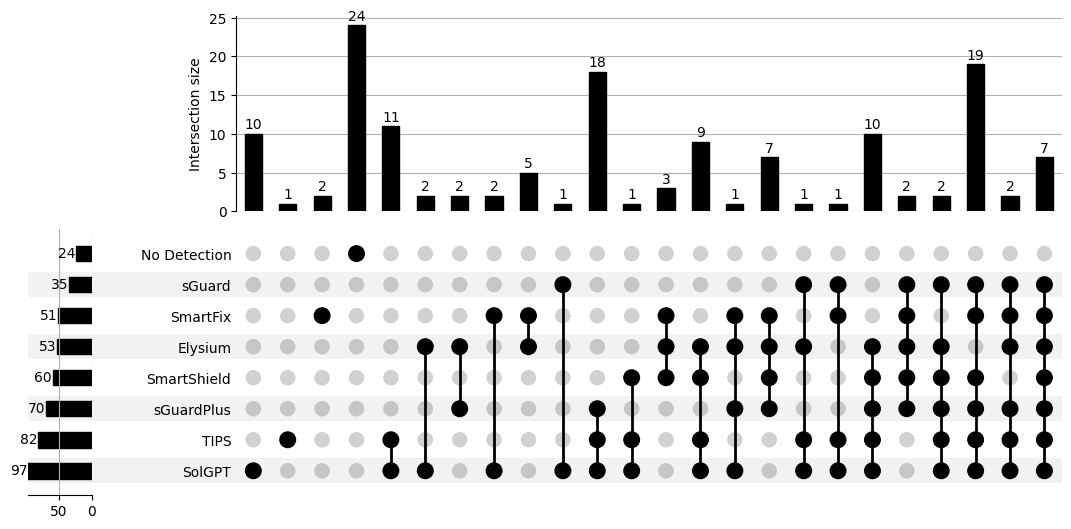

In [73]:
# OVERLAP FOR DETECTION
from matplotlib import pyplot as plt

from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")

/home/sofia/Documents/RepairComp/venv/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/sofia/Documents/RepairComp/venv/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  style

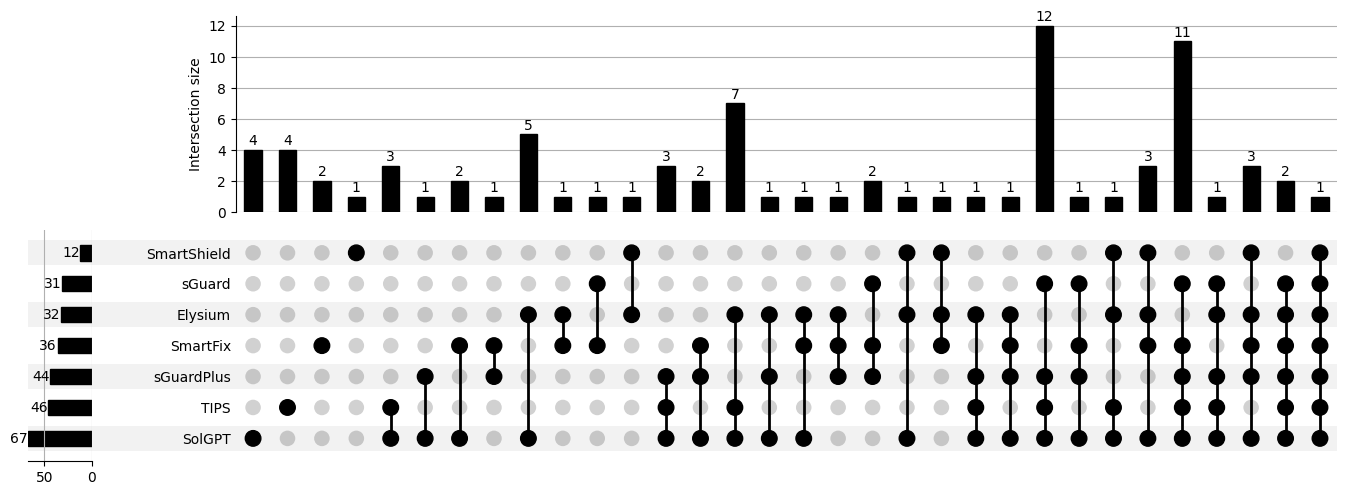

In [74]:
#Overlap for mitigation

left_list=tools#+['No Mitigation']
df=pd.read_csv(os.path.join(storage_path,'mitigated_exploits_contract_per_tool.csv'))
df=df.drop(['Total'], axis=1)
df['Name']=df['Contract'].apply(lambda x: x.split('/')[1])
df['Category']=df['Contract'].apply(lambda x: x.split('/')[0])
#df['No Mitigation'] = df[left_list[:-1]].apply(lambda row: all(row == False), axis=1)
df.drop(['Contract'], axis=1, inplace=True)
# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Name'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}
    
# OVERLAP FOR MITIGATION
from matplotlib import pyplot as plt

from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")
#plt.suptitle("Intersection of Exploits mitigated")
plt.savefig("../results/smartbugs/rq4_upset.pdf")
plt.show()